In [1]:
import pandas as pd
import matplotlib as plt
import scipy as sc
import numpy as np
from scipy import stats
#PyMC

In [2]:
data=pd.read_csv('brain_size.csv',sep=';',na_values='.')

pdf , cdf , sf => 1-cdf, ppf , isf 

In [3]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [4]:

x=np.linspace(-6,8,20)
sinx=np.sin(x)
cosx=np.cos(x)


In [5]:
dd=pd.DataFrame({'x': x, 'sin': sinx, 'cos': cosx})

In [6]:
dd.head(5)

,x,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.263158,0.852122,0.523343
2,-4.526316,0.982738,-0.185001
3,-3.789474,0.603498,-0.797364
4,-3.052632,-0.088844,-0.996046


In [7]:
nn=data.shape

In [8]:
nn[1]

8

In [9]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [10]:
dcol=data.columns.to_list()

In [11]:
dcol

['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count']

In [12]:
dcol[5]

'Weight'

In [13]:
for ll in dcol:
    print(ll,data[ll][3])

Unnamed: 0 4
Gender Male
FSIQ 133
VIQ 129
PIQ 128
Weight 172.0
Height 68.8
MRI_Count 965353


In [14]:
 print(data[dcol[3]])

0     132
1     150
2     123
3     129
4     132
5      90
6     136
7      90
8      93
9     114
10    129
11    150
12    129
13    120
14    100
15     71
16    132
17     96
18    112
19     77
20     83
21    107
22    129
23    145
24     86
25    145
26     90
27     96
28     83
29    126
30    126
31    145
32     96
33     96
34     90
35    129
36    150
37     86
38     90
39     91
Name: VIQ, dtype: int64


In [15]:
ll1=data[data['Gender']=='Female']['PIQ']

In [16]:
type(ll1)

pandas.core.series.Series

In [17]:
data[(data['Gender']=='Female') & (data['VIQ']>100)]

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
4,5,Female,137,132,134,147.0,65.0,951545
6,7,Female,138,136,131,138.0,64.5,991305
10,11,Female,132,129,124,118.0,64.5,833868
13,14,Female,140,120,147,155.0,70.5,856472
16,17,Female,132,132,120,127.0,68.5,852244
18,19,Female,101,112,84,136.0,66.3,808020
22,23,Female,135,129,134,122.0,62.0,790619
29,30,Female,130,126,124,159.0,66.5,866662
30,31,Female,133,126,132,127.0,62.5,857782


In [18]:
grGen= data.groupby('Gender')

In [19]:
for gen , value in grGen['VIQ']:
    print((gen, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [20]:
grGen.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [21]:
from pandas import plotting

In [22]:
#y= a+ b1*x1+b2 *x2 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb412d6d4f0>,
      dtype=object)

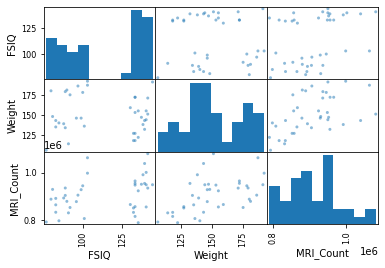

In [23]:
plotting.scatter_matrix(data[['FSIQ','Weight','MRI_Count']])

In [24]:
from scipy import stats

In [25]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [26]:
fVIQ=data[data['Gender']=='Female']['VIQ']
mVIQ=data[data['Gender']=='Male']['VIQ']

In [27]:
stats.ttest_1samp(fVIQ, mVIQ.mean())

Ttest_1sampResult(statistic=-1.1969212078453013, pvalue=0.24605874899676006)

In [28]:
from scipy.stats import norm
norm.cdf(0)

0.5

In [29]:
norm.cdf([-1., 0, 1])

array([0.15865525, 0.5       , 0.84134475])

In [30]:
norm.cdf(3)-norm.cdf(-3)

0.9973002039367398

In [31]:
norm.mean()

0.0

In [32]:
norm.std(), norm.var()

(1.0, 1.0)

In [33]:
norm.ppf(0.4)

-0.2533471031357997

In [34]:
norm.rvs(size=5)

array([ 0.89017968, -0.29766797,  1.92723118, -0.387155  , -0.39700303])

In [35]:
norm.rvs(loc=5, scale=3, size=5)

array([6.17362592, 6.90898581, 9.7560935 , 3.06603528, 4.70578745])

In [36]:
from scipy.stats import uniform

In [37]:
uniform.cdf([0,2,3,5,7], loc=2, scale=4)

array([0.  , 0.  , 0.25, 0.75, 1.  ])

In [38]:
from scipy.stats import gamma

gamma(x,a)=Lambda*(Lambda*x)^(a-1)/Gamma(a)*exp(-Lambda*x)

f(x)--> f(k*x)

In [39]:
gamma(1, scale=2).var()

4.0

In [40]:
gamma(1, scale=2).stats(moments='mv')

(array(2.), array(4.))

In [41]:
rv=gamma(1, scale=2)

In [42]:
rv.mean()

2.0

In [43]:
stats.t.isf([0.1, 0.05,0.02], [[7],[9]])

array([[1.41492393, 1.89457861, 2.51675242],
       [1.38302874, 1.83311293, 2.39844098]])

In [44]:
from scipy.stats import hypergeom
[M,n, N]=[20,7,12]

In [45]:
x=np.arange(4)*2
print(x)
prb=hypergeom.cdf(x,M,n,N)

[0 2 4 6]


In [46]:
prb

array([1.03199174e-04, 5.21155831e-02, 6.08359133e-01, 9.89783282e-01])

In [47]:
hypergeom.ppf(prb, M,n,N)

array([0., 2., 4., 6.])

# Работа с распределениями

fit, fit_loc_scale, nnlf

In [48]:
npoints=20
npointsh=npoints//2
npointsf=float(npoints)
nbound=4
normbound=(1+1/npointsf)*nbound
grid=np.arange(-npointsh, npointsh+2, 1)
gridlimitsnorm=(grid-0.5)/npointsh*nbound
gridlimits=grid-0.5
probs=np.diff(stats.truncnorm.cdf(gridlimitsnorm,-normbound, normbound))
gridint=grid[:-1]
normdiscrete=stats.rv_discrete(values=(gridint, np.round(probs, decimals=7)), name='normdiscrete')

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt


In [50]:

n_sm=500
np.random.seed(87654964)
rvs=normdiscrete.rvs(size=n_sm)
f,l=np.histogram(rvs, bins=gridlimits)
sfreq=np.vstack([gridint, f, probs*n_sm]).T

In [51]:
print(sfreq)

[[-1.00000000e+01  0.00000000e+00  2.95019349e-02]
 [-9.00000000e+00  0.00000000e+00  1.32294142e-01]
 [-8.00000000e+00  0.00000000e+00  5.06497902e-01]
 [-7.00000000e+00  1.00000000e+00  1.65568919e+00]
 [-6.00000000e+00  7.00000000e+00  4.62125309e+00]
 [-5.00000000e+00  1.10000000e+01  1.10137298e+01]
 [-4.00000000e+00  1.30000000e+01  2.24137683e+01]
 [-3.00000000e+00  3.90000000e+01  3.89503370e+01]
 [-2.00000000e+00  6.60000000e+01  5.78004747e+01]
 [-1.00000000e+00  8.10000000e+01  7.32455414e+01]
 [ 0.00000000e+00  7.80000000e+01  7.92618251e+01]
 [ 1.00000000e+00  7.50000000e+01  7.32455414e+01]
 [ 2.00000000e+00  4.60000000e+01  5.78004747e+01]
 [ 3.00000000e+00  3.90000000e+01  3.89503370e+01]
 [ 4.00000000e+00  2.30000000e+01  2.24137683e+01]
 [ 5.00000000e+00  1.20000000e+01  1.10137298e+01]
 [ 6.00000000e+00  6.00000000e+00  4.62125309e+00]
 [ 7.00000000e+00  1.00000000e+00  1.65568919e+00]
 [ 8.00000000e+00  0.00000000e+00  5.06497902e-01]
 [ 9.00000000e+00  1.00000000e+

In [52]:
np.histogram(rvs, bins=gridlimits)

(array([ 0,  0,  0,  1,  7, 11, 13, 39, 66, 81, 78, 75, 46, 39, 23, 12,  6,
         1,  0,  1,  1]),
 array([-10.5,  -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,
         -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,
          7.5,   8.5,   9.5,  10.5]))

(array([ 0.,  0.,  0.,  1.,  7., 11., 13., 39., 66., 81., 78., 75., 46.,
        39., 23., 12.,  6.,  1.,  0.,  1.,  1.]),
 array([-10.5,  -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,
         -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,
          7.5,   8.5,   9.5,  10.5]),
 <a list of 21 Patch objects>)

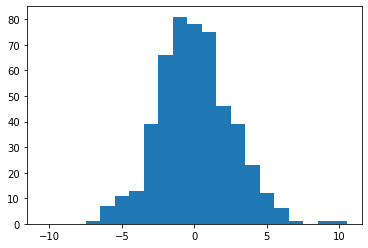

In [53]:
plt.hist(rvs, bins=gridlimits)

In [55]:
np.random.seed(81176554)
x=stats.t.rvs(12,size=1000)